## Explore: architectuur analyse

### Arrhythmia Dataset

- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 187. There is a target column named "target".

You can find this in `data/heart_big_train.parq` and `data/heart_big_test.parq`.


In [1]:
from pathlib import Path
import pandas as pd
import tomllib
import seaborn as sns
import matplotlib.pyplot as plt

datadir = Path('../data')
configfile = Path("config.toml")
with configfile.open('rb') as f:                                                                                                                   
    config = tomllib.load(f)
print(config)


{'ptb': 'heart', 'arrhythmia': 'heart_big'}


In [2]:
trainfile = datadir / (config['arrhythmia'] + '_train.parq')
testfile = datadir / (config['arrhythmia'] + '_test.parq')

train_df = pd.read_parquet(trainfile)
test_df = pd.read_parquet(testfile)
#number of rows 
print(len(train_df)+len(test_df))
len(train_df), len(test_df)


109446


(87554, 21892)

In [3]:
train_df.shape

(87554, 188)

In [4]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_df.target.value_counts(), test_df.target.value_counts()
train_percentages = train_df.target.value_counts(normalize=True) * 100
test_percentages = test_df.target.value_counts(normalize=True) * 100
train_percentages, test_percentages

(target
 0.0    82.772917
 4.0     7.345181
 2.0     6.610777
 1.0     2.539005
 3.0     0.732120
 Name: proportion, dtype: float64,
 target
 0.0    82.760826
 4.0     7.345149
 2.0     6.614288
 1.0     2.539741
 3.0     0.739996
 Name: proportion, dtype: float64)

In [14]:
train_df.target.value_counts()

target
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

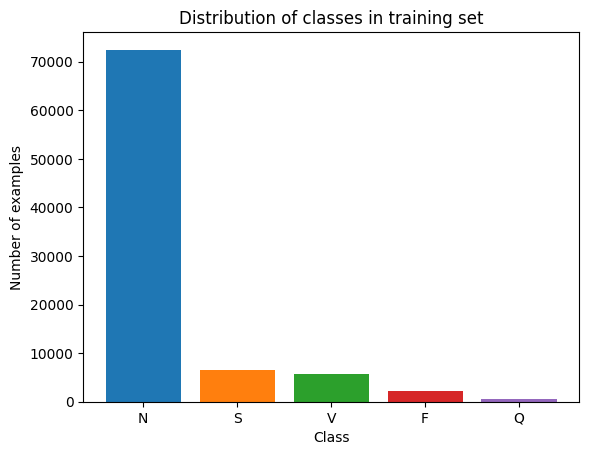

In [10]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
class_names = ['N', 'S', 'V', 'F', 'Q']
plt.bar(class_names, train_df.target.value_counts(), color = colors)

plt.xlabel('Class')
plt.ylabel('Number of examples')
plt.title('Distribution of classes in training set')
plt.show()


In [ ]:


signal = train_df.iloc[139, :-1]

print(signal)

0      1.000000
1      0.829949
2      0.220812
3      0.043147
4      0.185279
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 139, Length: 187, dtype: float64


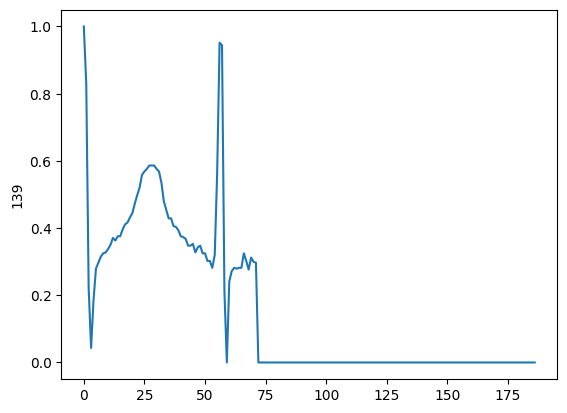

In [7]:
sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));

In [13]:
from src import datasets, metrics
traindataset = datasets.HeartDataset1D(trainfile, target="target")
testdataset = datasets.HeartDataset1D(testfile, target="target")
traindataset, testdataset

(Heartdataset (len 87554), Heartdataset (len 21892))

torch.Size([192, 1]) tensor(0)


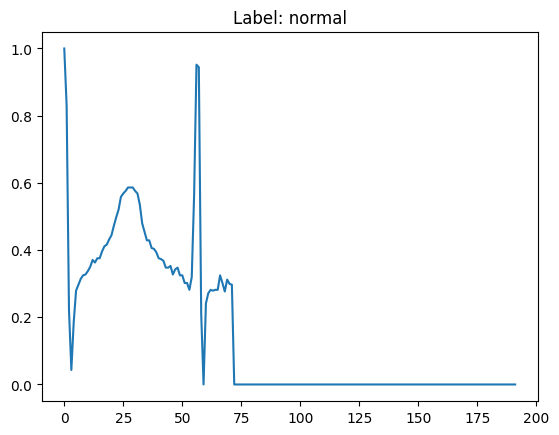

In [16]:
x, y = traindataset[139]
viz = x.squeeze().cpu().numpy()
sns.lineplot(x=range(len(viz)), y=viz)
title = 'normal' if y == 0 else 'abnormal'
plt.title(f"Label: {title}");
print(x.shape, y)

In [24]:
train_df[train_df['target']==2]

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
74694,0.000000,0.009756,0.074390,0.162195,0.240244,0.291463,0.370732,0.442683,0.498780,0.560976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74695,1.000000,0.865672,0.660448,0.458955,0.242537,0.126866,0.164179,0.242537,0.298507,0.350746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74696,0.556728,0.530343,0.440633,0.290237,0.171504,0.055409,0.005277,0.042216,0.000000,0.013193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74697,1.000000,0.968031,0.782609,0.512788,0.418159,0.381074,0.347826,0.320972,0.312020,0.295396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74698,0.000000,0.037681,0.101449,0.215942,0.236232,0.349275,0.389855,0.485507,0.539130,0.601449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80477,0.984199,0.975169,0.880361,0.848758,0.794582,0.753950,0.715576,0.584650,0.336343,0.194131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
80478,0.528846,0.455128,0.285256,0.000000,0.022436,0.054487,0.080128,0.064103,0.086538,0.064103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
80479,0.930921,0.927632,0.690789,0.250000,0.000000,0.021382,0.087171,0.125000,0.215461,0.302632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
80480,0.996124,0.997416,0.830749,0.534884,0.450904,0.408269,0.369509,0.355297,0.342377,0.337209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [35]:
train_df[train_df['186']>0]


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
29,0.962662,0.928571,0.441558,0.000000,0.051948,0.176948,0.181818,0.206169,0.228896,0.222403,...,0.228896,0.219156,0.230519,0.235390,0.232143,0.227273,0.228896,0.238636,0.237013,0.0
59,0.921635,0.909710,0.448041,0.068143,0.151618,0.269165,0.303237,0.327087,0.323680,0.316865,...,0.311755,0.321976,0.311755,0.315162,0.332198,0.333901,0.327087,0.339012,0.352641,0.0
469,0.991597,0.858824,0.265546,0.000000,0.168067,0.248739,0.272269,0.300840,0.290756,0.285714,...,0.289076,0.292437,0.292437,0.287395,0.299160,0.307563,0.307563,0.302521,0.309244,0.0
535,1.000000,0.967532,0.464286,0.000000,0.128247,0.258117,0.254870,0.274351,0.287338,0.282468,...,0.288961,0.288961,0.293831,0.298701,0.285714,0.292208,0.310065,0.310065,0.295455,0.0
641,0.823276,0.808190,0.571121,0.409483,0.183190,0.077586,0.049569,0.030172,0.002155,0.012931,...,0.465517,0.349138,0.299569,0.295259,0.273707,0.280172,0.252155,0.258621,0.241379,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80371,0.000000,0.054441,0.180516,0.269341,0.318052,0.392550,0.409742,0.515759,0.664756,0.661891,...,0.719198,0.581662,0.532951,0.512894,0.530086,0.521490,0.527221,0.535817,0.524355,2.0
80425,0.505988,0.476048,0.281437,0.000000,0.017964,0.062874,0.077844,0.113772,0.134731,0.125749,...,0.305389,0.317365,0.311377,0.320359,0.320359,0.329341,0.326347,0.335329,0.329341,2.0
80455,0.459350,0.444444,0.367209,0.186992,0.147696,0.193767,0.140921,0.063686,0.029810,0.000000,...,0.365854,0.367209,0.368564,0.356369,0.371274,0.445799,0.494580,0.405149,0.398374,2.0
80459,0.024779,0.000000,0.069027,0.161062,0.270796,0.313274,0.366372,0.398230,0.431858,0.486726,...,0.497345,0.516814,0.575221,0.568142,0.566372,0.566372,0.575221,0.564602,0.573451,2.0


torch.Size([192, 1]) tensor(3)


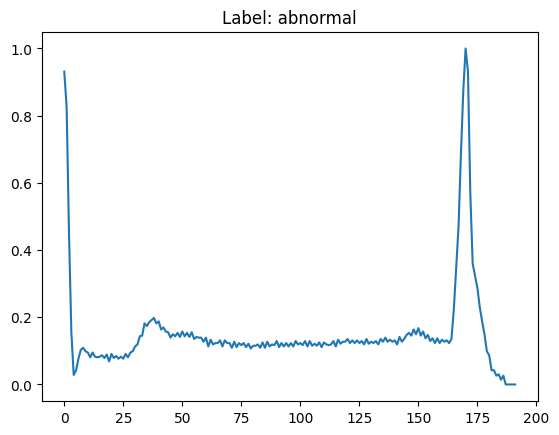

In [36]:

x, y = traindataset[80969]
viz = x.squeeze().cpu().numpy()
sns.lineplot(x=range(len(viz)), y=viz)
title = 'normal' if y == 0 else 'abnormal'
plt.title(f"Label: {title}");
print(x.shape, y)

torch.Size([192, 1]) tensor(2)


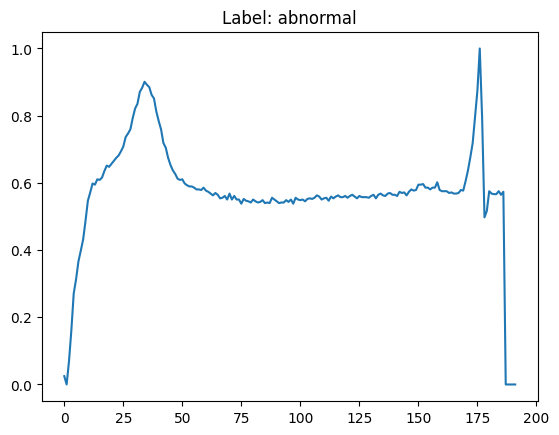

In [37]:
x, y = traindataset[80459]
viz = x.squeeze().cpu().numpy()
sns.lineplot(x=range(len(viz)), y=viz)
title = 'normal' if y == 0 else 'abnormal'
plt.title(f"Label: {title}");
print(x.shape, y)

In [ ]:
# Exploration notes en observations
- Dataset is a time series
- Dataset is unbalanced (class 3 has 0.75 of the data)
- The signal is not normalized?
- The signal is not centered due to padding, padding maakt de data points te groot?

# about the 1D model
- The model is a transformer with a transformer block and 1D convolutional layer

Transofrmer block with the following hyperparameters:
16 hidden units
Dropout  0.1
heads 4

Transformer is 1D conv
1 block
1 positional encoding
2x skiplayer

Accuracy: model presteert slecht met 1, 2, 3 

# about the 2D model
- Model CNN 2D bestaat uit:
2 layers with ReLU
1 MaxPool2d layer
Dense layer bestaat uit 2 linear layers

Hyperparameters:
- 16 hidden units
- 1 block met 2 conv

Accuracy: 96% but with a low accuracy for class 3 and 5



**Precision**: Hoeveel van de voorspellingen voor een bepaalde klasse zijn daadwerkelijk correct? 
**Precision** (ook wel **positieve voorspellingsnauwkeurigheid**) geeft aan hoeveel van de voorspellingen van de positieve klasse correct zijn. 
Dit is vooral belangrijk wanneer je wilt weten hoe betrouwbaar de voorspellingen van een specifieke klasse zijn.

**Recall**: Hoeveel van de werkelijke gevallen van een bepaalde klasse zijn correct voorspeld? 
Recall (ook wel gevoeligheid of True Positive Rate) geeft aan hoeveel van de **werkelijke positieve gevallen correct** door het model worden voorspeld. 
Het is de maatstaf voor hoe goed het model in staat is om positieve gevallen te detecteren binnen elke klasse.

# Macro F1 score
Voor alle experimenten (gezien de medische aard) is F1 score van belang vooral bij ongebalanceerde datasets. Uit eigen onderzoek heb ik het volgende begrepen:
F1 score: Bereken de F1-score per klasse en neem vervolgens het gemiddelde van die scores. Dit betekent dat elke klasse evenveel gewicht krijgt bij de berekening, ongeacht het aantal voorbeelden in de klasse (en dus ongeacht hoe frequent of zeldzaam de klasse is).
Macro Precision metric geeft meer inzicht in het verschil tussen de prestaties van de klassen
Macro Recall geeft gemiddelde recall over alle klassen, waarbij elke klasse gelijk wordt gewogen.

# Experiment 1 16 januari
Netwerkverbreding: Door het aantal hidden units in beide modellen te verhogen, verwachten we een verbeterde accuracy door een grotere capaciteit van het model. We verdubbelen het aantal hidden units naar 32 in beide modellen en voegen een extra block toe om het model dieper te maken.


## 2D conv: observaties
Meer capaciteit verbetert de accuracy en leidt tot de hoogste F1-score macro.
Het gebruik van 2 blocks (4 convolutionele lagen) zorgt voor slechtere prestaties dan met 1 block, waarbij het model overfit en de accuracy voor class 2 en 3 zelfs verslechtert.
Over het algemeen presteert een 2D convolutioneel model beter, maar overfit het snel en werkt niet goed bij diepere lagen, wat kan wijzen op het feit dat een 2D-conv niet geschikt is voor time-series data. In diepere lagen gaat er namelijk te veel informatie verloren.
Naar verwachting zou een GRU of LSTM betere prestaties leveren, omdat deze modellen meer geschikt zijn voor timeseries

## 1D conv + transformer: observaties
Bredere modellen: Meer hidden units verbeteren de accuracy, maar de verschillen zijn minimaal.
Diepere modellen: Het toevoegen van meer blocks (verdubbeling van multi-head attention) levert vergelijkbare resultaten op als het 2D-conv model, met als verschil dat class 3 beter wordt voorspeld.
Zowel de F1-score macro als accuracy verbeteren bij meer hidden units en meer lagen, maar het model lijkt te complex (overkill) voor deze dataset.
Dit model lost echter niet het grootste probleem op: het onvoldoende detecteren van een klasse met weinig data.
Een transformer met een diepere structuur en meer capaciteit bereikt een hogere accuracy, maar lijkt ook net als het 2D-conv model te overfitten.
De voorspelling van class 3 blijft een probleem, aangezien er weinig data is voor deze klasse. De transformer met dubbele multi-heads behaalt de hoogste accuracy (0.389), wat 0.10 hoger is dan de 2D-conv met 32 hidden units.
In het algemeen presteert het 2D-conv model beter, maar lijkt ook sneller te overfitten, gezien de train-prediction voor class 0, 1, en 3 hetzelfde zijn.

# algemene observaties conclusies
Het 2D conv model is ongeschikt voor de classificatie, het volgende experiment zal een GRU of LSTM worden gebruikt
Het transformer model presteert beter met meer hidden units en meer attention maar traint langer en groeit exponentieel, wat voor deze dataset misschien overbodig is.
Het feit dat de dataset ongebalanceerd is, maakt het moeilijk om de dataset als zodanig te trainen. Het moet een oplossing komen voor het balanceren van de dataset.
Ik overweeg een autoencoder te testen gezien het grote aantal data in de klasse 'normaal' is dit een goede basis om een autoencoder model te gebruiken.


# Experiment 2 aanwijzingen:
- LSTM of GRU testen ipv 2D conv model
- Autoencoder idee verder onderzoeken
- 1D Transformer testen met een aangepaste input (weet nog niet welke), om meer balans te krijgen in de dataset
bijv. data-augmetatie of iets dergelijks



# EXPERTIMENT 2: GRU - 17 JAN

Model hyperparameters 1: 'hidden_size': 256, 'dropout': 0.1, 'output_size': 5, 'num_layers': 4
Model hyperparameters 2: 'hidden_size': 64, 'dropout': 0.1, 'output_size': 5, 'num_layers': 2
Model hyperparameters 3: 'hidden_size': 128, 'dropout': 0.1, 'output_size': 5, 'num_layers': 2
Model hyperparameters 3: 'hidden_size': 256, 'dropout': 0.1, 'output_size': 5, 'num_layers': 2

# Expected:
GRU should be to keep track of information in timeseries, using its memory architecture and give better results.

## Key Observations:
Too Many Layers (4 layers): In the first experiment, using 4 layers made the training process take much longer (12 minutes vs. 5 minutes for other models). The accuracy results were decent, but you mentioned class 3 had a high accuracy compared to other classes, which is intriguing.

Accuracy of Class 3: In the first experiment, class 3 seems to perform significantly better than the other classes, with high accuracy values across multiple epochs (like 0.9596 for class 3). This might be because of the model's architecture or possibly due to class imbalance—class 3 might have been overrepresented or learned better due to its easier representation.

Model 2 (Fewer Layers, Faster): The second experiment trained much quicker (2 minutes), but accuracy for classes 1 and 3 went to 0, and class 0 still had good accuracy (0.99). This suggests that:

Class imbalance is likely affecting the model. If one class dominates, the model might perform well for that class but poorly for others.
With fewer layers and fewer units, the model is possibly underfitting or unable to capture enough complex patterns.
Model 3 (Optimized Hyperparameters): The third experiment showed quicker training time, and accuracy improved but then dropped in the last epoch. The best results were in epoch 4: ['0.9534', '0.9534', '0.8004', '0.9534', '0.7986']. This seems to indicate that:

2 or 3 layers with 256 hidden units might be a good trade-off between training time and performance.
Drop in accuracy in later epochs could indicate overfitting, or the model might be struggling to generalize well on the test set.
Model 4 (Disappointing Results): In the fourth experiment, despite a decent training time of 6.5 minutes, the results were disappointing. Classes 1 and 3 had 0 accuracy on the test set, while class 0 remained accurate. This might suggest:

The model overfitted to class 0, due to class imbalance.
The architecture might need adjustment (perhaps fewer layers, or more attention to balancing techniques).

## General Conclusion:
Fewer layers (around 2-3) seem to work better for this task. More than 3 layers might cause the model to overfit or become too complex for the task.
The hidden size of 256 might be a good balance between model capacity and performance, though experimenting with smaller sizes (e.g., 128) could be worth trying during hypertuning.
The unbalanced dataset seems to be a significant challenge, with some classes (like class 0) dominating the predictions, leading to high accuracy in those classes but poor performance for others.

# Next steps notes:
1. handle class imbalance:
    - resample with SMOTE (Synthetic Minority Over-sampling Technique) or undersample the majority class
    - Weighted loss functions can be applied to penalize the model more for misclassifying minority classes.
2. Experiment with Regularization:
Adjust dropout or L2 regularization to prevent overfitting, especially since you're working with deep models (up to 4 layers).
You can tune the dropout rate to see if it helps improve the performance on underrepresented classes.
3. Try more epochs with early stopping once test performance degrades (to avoid overfitting)

2D CONV

{'hidden': 32, 'num_blocks': 1, 'num_classes': 5, 'shape': (16, 12)}

{'hidden': 128, 'num_blocks': 1, 'num_classes': 5, 'shape': (16, 12)}

# Hyperparameter Tuning:
experiment with different hidden sizes, with values between 128, 64, up to even 512 for a broader search.
Also, explore optimizers to adjust the learning rate




# EXPERTIMENT 3: LSTM - 16 JAN

Model hyperparameters 1: 'hidden_size': 64, 'dropout': 0.1, 'output_size': 5, 'num_layers': 2
Model hyperparameters 2: 'hidden_size': 128, 'dropout': 0.01, 'output_size': 5, 'num_layers': 3
Model hyperparameters 3: 'hidden_size': 256, 'dropout': 0.01, 'output_size': 5, 'num_layers': 3
Model hyperparameters 3: 'hidden_size': 256, 'dropout': 0.3, 'output_size': 5, 'num_layers': 3

# LSTM results
The LSTM dit not deliver the expected results, the model with different hyperparameters did not reach any top level accuracy.
The result were disappointing! Decreasing the dropout resulted in no improvements. Increasing the dropout rate delivered better accuracy but the test set showed the model was totally overfitting the normal dataset and not able to detect any other class.

This shows however how good the LSTM could be used to compress the data in an encoder for anomaly detection!

# EXPERIMENT 4: AUTOENCODER + GRU OR 1DCNN -- KERNEL NOT WORKING, GIVING UP - 18 JAN

The idea is to train an autoencoder for the normal data and to detect anomaly, then to classify the anomaly on the base of the other data using a GRU or 1DCNN or the transformer.
I created two datasets, one normal and one anomous, then created an autoncoder and run a notebook but the autoencoder is too large for my RAM and my kernel stops. I don't think I will be able to solve this in a short time, considering all that I need to do for the exam.
It was a nice idea: training an autoencoder with the normal dataset to detect which heartbeat is anomalous and then training a second model with a 1DConv to detect which anomaly it is.

# EXPERIMENT 5: OVERSAMPLING MINORITY DATASET
Looked into new solutions to balance the dataset.
I choose for the most simple one, random oversamplig of the minority classes. 
Expected: the GRU model, 2DCNN and Transformer should work better and give better accuracy for the anomaly classes.

## GRU Model:
Results:

Training Accuracy: ['0.9508', '0.9508', '0.8134', '0.9508', '0.8539']
Test Accuracy: ['0.972', '0.513', '0.888', '0.286', '0.920']
**Observations**:

The fact that the test accuracy is generally better than the training accuracy is a good sign that the model is not overfitting. Overfitting would typically show a huge gap between training and test performance, which is not the case here.
However, the accuracy for minority classes 1 and 3 is still disappointing. This suggests that oversampling the minority class might not be enough by itself.
Update/Forget Mechanism (likely referring to GRU's gating mechanism) may help prevent overfitting but might still not sufficiently address the imbalance problem.
Possible Solutions:

Use SMOTE or SMOTEEN: SMOTE (Synthetic Minority Oversampling Technique) or SMOTEEN (which combines SMOTE with Edited Nearest Neighbor to clean up noisy instances) can be helpful here. These techniques would generate synthetic samples instead of just duplicating minority class samples, which might result in better generalization and less overfitting.
Downsampling the Majority Class: Instead of oversampling the minority class, I could be to downsample the majority class without introducing synthetic examples, which may help with overfitting.
Class Weighting: For GRU models, try assigning higher class weights to minority classes in the loss function.

## 1D Transformer:
Results for 5 epoch:
training_results=['0.9451', '0.9451', '0.7822', '0.9451', '0.8841']
test_results=['0.959',   '0.593', '0.888', '0.910', '0.959']
difference: [-0.014  0.352 -0.106  0.035 -0.075]

Results for 10 epoch:
After editing the Full connected layer + dropout
{'hidden': 128, 'dropout': 0.1, 'output': 5, 'num_heads': 4, 'num_blocks': 1}
training_results=['0.9520', '0.9520', '0.8009', '0.9520', '0.8884']
test_results=['0.9530', '0.750', '0.926', '0.883', '0.978']
difference: [-0.001  0.202 -0.125  0.069 -0.09 ]S

After adding scheduler ReduceLRonPlateu
{'hidden': 128, 'dropout': 0.1, 'output': 5, 'num_heads': 4, 'num_blocks': 2}
training results: ['0.9630', '0.9630', '0.8438', '0.9630', '0.9111']
test results: ['0.974', '0.650', '0.962', '0.614', '0.975']
diff: [-0.011  0.313 -0.118  0.349 -0.064]

For 30 epochs with scheduler
{'hidden': 128, 'dropout': 0.1, 'output': 5, 'num_heads': 8, 'num_blocks': 1}
training: Epoch 29 train 0.0832 test 0.0873 metric ['0.9727', '0.9727', '0.8755', '0.9727', '0.9323']
test results: [0.982 0.782 0.961 0.78  0.986]
difference: [-0.009  0.191 -0.086  0.193 -0.054]

{'hidden': 256, 'dropout': 0.1, 'output': 5, 'num_heads': 4, 'num_blocks': 2}
Epoch 29 train 0.1975 test 0.1726 metric ['0.9547', '0.9547', '0.8328', '0.9547', '0.9014']
training_results=['0.9547', '0.9547', '0.8328', '0.9547', '0.9014']
test_results=[0.961 0.691 0.917 0.545 0.978]

Observations:
The 1D Transformer seems to perform well, with an impressive improvement in test accuracy, especially for the majority classes. This suggests that the Transformer is benefiting from the oversampling applied to the minority classes.
The test accuracy for classes 1 and 3 is still lower, but the model performs better than the GRU model for these classes.
Weighting classes 1 and 3 (i.e., assigning more weight to the minority classes) could help the Transformer to pay more attention to these classes during training.

# 2D CONV

2D hyperparameters: {'hidden': 128, 'num_blocks': 1, 'num_classes': 5, 'shape': (16, 12)}
training results:['0.9727', '0.9727', '0.8715', '0.9727', '0.9358']
test results:    ['0.981',   '0.831', '0.969',   '0.697', '0.978']


Possible Actions:
**Class Weights**: Assigning higher class weights to minority classes (like classes 1 and 3) would encourage the Transformer to focus more on these classes. This is an effective technique, especially with models like Transformers that use attention mechanisms.
**Attention Mechanism**: Transformers naturally focus on relevant parts of the sequence due to their attention mechanism: experiment with tuning the attention layers, especially how they treat the minority classes.
**Data Augmentation**: Another option for Transformers would be to explore data augmentation techniques (for time-series data, this could involve transformations like jittering, window slicing, etc.).


## NEXT STEPS:
Implement model’s loss function to include class weights or try other options
start hypertuning on 2D CNN and 1D transformer (attention blocks) and see what appens
Also, try the 2DCNN with oversampling...!


# EXPERIMENT 6: CLASS REWEIGHTING ON 1D AND 2D - 18 JAN

Manual testing for schedulers, optimizers, dropout, reweighting

# Reweighting
Both model have been succefully reweighted using sklearn class weight function.
class_weight ('balanced'):
'balanced': Automatically adjusts the weights inversely proportional to the class frequencies. This is useful when you have a highly imbalanced dataset.
A dictionary where keys are the class labels and values are the corresponding weight values. If provided, it overrides the class_weight parameter.

## Results and observation
Epochs: 15 
**2D CNN**: gives extraordinary results
{'hidden': 128, 'num_blocks': 1, 'num_classes': 5, 'shape': (16, 12)}
Epoch 14 train 0.0030 test 0.1011 metric ['0.9853', '0.9853', '0.9375', '0.9853', '0.9661']
Test result: ['0.992', '0.849', '0.959', '0.847', '0.989'] highest result ever for class 3
Observation: the accuracy goes up and down, thanks to scheduler it goes up again after 2 epochs, during hypertuning should be researched which scheduler is the best.
**1D Transformer**: extraordinary disappointing,
{'hidden': 128, 'dropout': 0.1, 'output': 5, 'num_heads': 8, 'num_blocks': 2}
Epoch 0 train 0.2292 test 4.6028 metric ['0.1117', '0.1117', '0.0629', '0.1117', '0.2718']
Epoch 5 train 0.1435 test 3.4114 metric ['0.7691', '0.7691', '0.3148', '0.7691', '0.3753']
Epoch 29 train 0.0843 test 3.8838 metric ['0.6811', '0.6811', '0.2964', '0.6811', '0.3936']
The transformer does not learn at all!
Reasons hypthesis: weights are balanced within the CrossEntropyLoss function, could cause a weight decay during attention calculation?
New insights: tried running the model without weights adaptation BUT in MPS instead of CPU, the problem of weight decay is clearly an issue.
Must be somthing wrong with my code...?
problem solved by adding device to the trainer code

new tests:
{'hidden': 128, 'dropout': 0.1, 'output': 5, 'num_heads': 8, 'num_blocks': 2}
Epoch 0 train 0.5077 test 0.7919 metric ['0.7553', '0.7553', '0.3252', '0.7553', '0.3923']
Epoch 29 train 0.0608 test 1.6566 metric ['0.7983', '0.7983', '0.2506', '0.7983', '0.2867']

# Learnings and observations
The reweighting created a lot of issues with Transformer architecture, but was an eye opener for the 2D convolution! 
Running the MPS delivered one more insight: the performance of the model is different! Did not quite understand why, probably has to do with parallel run of training? In any case on MPS caused the transformer to die under heavy weight decay/vanishing gradient and performed really bad.

# New trials to test
New architecture: **2DTransformer**
Since the 2D CNN is doing so well, I thought, why not giving it a chance with the transformer architecture.
As I still think the transformer can be useful to detect anomalies because it can map a certain distribution to the vectorspace why the CNN can help retrieving the correct features.


# EXPERIMENT 7: COMBINE TRANSFORMER WITH 2D CNN

Trained 15 epochs
Tuning: {'hidden': 128, 'num_blocks': 1, 'num_classes': 5, 'shape': (16, 12)}
Epoch 0 train 0.5799 test 0.2683 metric ['0.9184', '0.9184', '0.7199', '0.9184', '0.8083']
Epoch 29 train 0.0982 test 0.1023 metric ['0.9685', '0.9685', '0.8796', '0.9685', '0.9429']
test_results=[0.991 0.85  0.96  0.854 0.99 ]
difference: ['0.022', '-0.119', '0.08', '-0.115', '0.047']

I think this is the best model ever, which I want to hypertune!
To explore in hypertuning and in testing:
- scheduler 



# BEST MODELS FOR TUNING - 19 JAN

1. 2D CNN reweighting and fully oversampling
15 epochs, {'hidden': 128, 'num_blocks': 1, 'num_classes': 5, 'shape': (16, 12)}
train results = Epoch 14 train 0.0030 test 0.1011 metric ['0.9853', '0.9853', '0.9375', '0.9853', '0.9661']
test_results=[0.991 0.85  0.96  0.854 0.99 ]
difference: ['0.026', '-0.115', '0.105', '-0.111', '0.052']
scheduler= scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau,
scheduler_kwargs={"factor": 0.5, "patience": 2}

with Resnet blockk:
{'hidden': 128, 'num_blocks': 1, 'num_classes': 5, 'shape': (16, 12)}
Epoch 14 train 0.0064 test 0.0787 metric ['0.9867', '0.9867', '0.9432', '0.9867', '0.9648']
test_results=[0.993 0.821 0.957 0.82  0.991]

2. 1DCNN + TRANSFORMER with oversampling (no reweighting)
15 epochs
{'hidden': 128, 'dropout': 0.1, 'output': 5, 'num_heads': 8, 'num_blocks': 1, 'shape': (16, 12)}
train results = Epoch 14 train 0.1387 test 0.1139 metric ['0.9648', '0.9648', '0.8551', '0.9648', '0.9379']
test_results=[0.97  0.759 0.952 0.794 0.981]
difference between test and train: ['0.005', '-0.206', '0.097', '-0.171', '0.043']

{'hidden': 128, 'dropout': 0.1, 'output': 5, 'num_heads': 8, 'num_blocks': 1, 'num_classes': 5}
test_results=[0.961 0.898 0.944 0.895 0.986]




# EXPERIMENT 7: COMBINATION 2D CNN AND TRANSFORMER TO ONE MODEL + full oversampling

In this experiment:
redid oversampling to achive more balanced dataset. Downsampled class 0 and upsampled the rest
run the transformer with scheduler, results (transformer 1D):
{'hidden': 128, 'dropout': 0.1, 'output': 5, 'num_heads': 8, 'num_blocks': 1}
Epoch 14 train 0.0937 test 0.1766 metric ['0.9419', '0.9419', '0.7937', '0.9419', '0.9365']
traning_result=['0.9419', '0.9419', '0.7937', '0.9419', '0.9365']
test_results=[0.942 0.863 0.935 0.943 0.984]
difference: ['0.0', '-0.079', '0.141', '0.001', '0.047']

**Observations**:
the difference between the training result and the test results is clearly less which means the resampling is a good solution and the model does not overfit the samples, especiall the most present class as before.

test with GRU:
{'input': 1, 'hidden': 128, 'dropout': 0.4, 'output': 5, 'num_layers': 4}
Epoch 4 train 0.1976 test 0.2311 metric ['0.9226', '0.9226', '0.7599', '0.9226', '0.9269']
test_results=[0.916 0.796 0.895 0.933 0.976]

With scheduler:
{'input': 1, 'hidden': 64, 'dropout': 0.4, 'output': 5, 'num_layers': 2}
Epoch 14 train 0.1447 test 0.2754 metric ['0.9042', '0.9042', '0.6817', '0.9042', '0.9152']
test_results=[0.894 0.842 0.935 0.938 0.988]

GRU is still underperforming and takes a log time to train.

# Redoing traning Transformer 2D
Found out that due to an error, I was not training the right model with 2D CNN, now I will re-do the tests.

Observation
Training of transformer with 2D CNN takes longer, also because of reweighting and oversampling (more samples to train)
The trainig is stable (does not go up and down like with 1D conv), also because of scheduler (which works better than in 1D conv). Probably because the 2D conv, is less affected by weight decay (bigger weights?)

# EXPERIMENT 8: ADDING RESNET BLOCK to 1D cnn  and Transformer

**ResNetBlock** consists of two convolutions with batch normalization, ReLU activation, and a skip connection that adds the input back to the output.
Hypthesis: the ResNet block would help with longer training, supporting the gradient.

2D CNN met Resnet (werkt): First, add ResNet blocks to the 2D CNN layers. Each ResNet block should have a convolutional layer followed by a skip connection.
Introduces residual connections to ease the training of deeper networks, improving gradient flow and enabling learning of more complex representations.
2D CNN: Good at extracting local spatial features from the data (like images or spatial sequences).

15 epochs;
Epoch 14 train 0.0064 test 0.0787 metric ['0.9867', '0.9867', '0.9432', '0.9867', '0.9648']
{'hidden': 128, 'num_blocks': 1, 'num_classes': 5, 'shape': (16, 12)}
test_results=[0.993 0.821 0.957 0.82  0.991]

**1D CNN + transformer + ResNet (werkt)**
Integrate the ResNet block into the Transformer after the 1D convolutional layer and before the transformer layers, allows the network to capture local features and then pass them to the transformer layers.
Adding the Resnet to this model should give more stable performance to the 1D cnn and helps the network learn residual features and prevents overfitting especially if I want to hypertune with more transformerblocks.
Epoch 14 train 0.0858 test 0.1337 metric ['0.9570', '0.9570', '0.8140', '0.9570', '0.9484']
{'hidden': 128, 'dropout': 0.1, 'output': 5, 'num_heads': 8, 'num_blocks': 1, 'num_classes': 5}
test_results=[0.956 0.874 0.935 0.912 0.99 ]

Observation: 1D cnn with Resnets block is doing well on upsampled data which is amazing, could mean overfitting though.
I am tempt to try with a less balanced dataset.


**TransformerWithCNNResNet (werkt)**
2D Convolution + ResNet + TRANSFORMER: 2D CNN capture features, ResNet makes the traing easier and the Transformer captures long-range dependences (read anomalies)
The network starts with an initial convolution, followed by multiple ResNet blocks, and ends with a MaxPool operation.
Transformer: The output from the CNN+ResNet part is passed into a Transformer encoder. The output of the Transformer is averaged (global pooling) and passed through fully connected layers for classification.
Fully Connected Layers: After the transformer layers, a fully connected layer produces the final class logits.

Epoch 14 train 0.0736 test 0.1449 metric ['0.9478', '0.9478', '0.7955', '0.9478', '0.9415']
{'hidden': 128, 'dropout': 0.1, 'output': 5, 'num_heads': 8, 'num_blocks': 1, 'num_classes': 5}
test_results=[0.947 0.868 0.955 0.889 0.988]


# OBSERVATION BEFORE HYPERTUNING - 21 JAN
2D CNNs performs best for quick training and efficient feature extraction, but they can overfit if trained for too long, this is to be tested during hypertuning. Adding a ResNet block may prevent that.

Fully oversampled dataset delivers the best results
2D CNN in combinantion with balance weightning should be tested further on a semi-balanced trainingset (if there is time!).

Transformer 2D architectures are powerful for modeling long-range dependencies and can improve with longer training, yielding higher F1/Recall scores for challenging tasks.
A hybrid approach that uses both CNNs (for local features) and Transformers (for global attention) seems like the right way forward for this dataset.

Ultimately, a Transformer-based model can indeed be the winning architecture if trained properly and leveraged with CNN feature extraction as its first stage. Still not sure if the Resnet blocks adds more capacity or just make the training longer.
Also Transformer with 1D and 2D CNN makes a difference.

Hypertuning will find the right balance between model complexity, training time, and dataset characteristics to fully realize the model potential.

1. HYPERTUNING PLAN - 21 JAN

First run I try them all, second run select the best ones
Three main models: 2D CNN, 1D CNN Transformer, 2D CNN Transformer
Variations: with Restnet blocks, scheduler

MODEL | HIDDEN UNIT RANGE | NUM BLOCKS | SCHEDULER | EPOCHS | TRAINSET | WEIGHT BALANCING | 
2DCONV | 32-256| 1-4 | ReduceLROnPlate "factor": 0.2-5, "patience": 2-4 | 20-50 | full balanced | no
2DCONV Resnet | 32-256| 1-4 | ReduceLROnPlate "factor": 0.2-5, "patience": 2-4 | 20-50 | full balanced | no/yes


MODEL | HIDDEN UNIT RANGE | NUM BLOCKS | SCHEDULER | EPOCHS | TRAINSET | WEIGHT BALANCING | 
Transformer 1D | 32-256| 1-4 | ReduceLROnPlate "factor": 0.5-1, "patience": 2-5 | 15-30 | full balanced | no
Transformer 1D resnet | 32-256| 1-4 | ReduceLROnPlate "factor": 0.5-1, "patience": 2-5 | 15-30 | full balanced | no

Transformer 2D | 32-256| 1-4 | ReduceLROnPlate "factor": 0.2-6, "patience": 2 | 15-50 | full balanced | no
Transformer 2D resnet | 32-256| 1-4 | ReduceLROnPlate "factor": 0.2-6, "patience": 2 | 15-50 | full balanced | no



# HYPERTUNING 2DCON vs 2DCONV RESNET
Hypothesis: 2DConv with Resnet would reach a better accuracy without overfitting
Test during hypertuning: 
- 2 schedulers and their args (in the config)


Best models: 
- 2D Conv reach 
Best model 15 epochs:

| Parameter          | Value                                                                                           |
|--------------------|-------------------------------------------------------------------------------------------------|
| Trial ID           | traning_2025-01-21-20_20-12-30 / 65c89a6                                                          |
| Iterations         | 15                                                                                              |
| Train Loss         | 0.0008070722687989473                                                                           |
| Test Loss          | 0.14336685836315155                                                                             |
| Accuracy           | 0.9844206871345029                                                                              |
| F1 Score Micro     | 0.9844206871345029                                                                              |
| F1 Score Macro     | 0.9224417193418725                                                                              |
| Precision Macro    | 0.9519421412253443                                                                              |
| Recall Macro       | 0.949650985449643                                                                               |
| Timestamp          | 1737498675                                                                                      |
| Batch Size         | 32                                                                                              |
| Hidden Units       | 108                                                                                             |
| Dropout            | 0.0                                                                                             |
| Number of Layers   | 3                                                                                               |
| Model Type         | 2DCNN                                                                                           |
| Number of Blocks   | 1                                                                                               |
| Number of Classes  | 5                                                                                               |
| Shape              | [16, 12]                                                                                        |
| Time Trial         | 3 hours, 18 minutes, and 41.02 seconds                                                          |

- 2CNN Resnet

| Parameter       | Value                                                                                           |
|-----------------|-------------------------------------------------------------------------------------------------|
| Date            | 2025-01-22-12-48-20                                                                             |
| Trial ID        | 102d91aa                                                                                        |
| Accuracy        | 0.9832261029411765                                                                              |
| Batch Size      | 32                                                                                              |
| Hidden Units    | 133                                                                                             |
| Dropout         | 0.10267061456918729                                                                             |
| Number of Layers| 3                                                                                               |
| Model Type      | 2DCNNResnet                                                                                     |
| Number of Blocks | 1                                                                                              |
| Scheduler       | `<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>`                                          |
|Total running time| 1hr 11min 11s                                                                                  |



| Parameter             | Value                                 |
|-----------------------|---------------------------------------|
| Current Time          | 2025-01-22 17:44:24                   |
| Total Running Time    | 3hr 24min 59s                         |
| Current Best Trial    | 12b9f0cb                              |
| Accuracy              | 0.9852941176470589                    |
| Preprocessor          | BasePreprocessor                      |
| Batch Size            | 32                                    |
| Hidden Units          | 203                                   |
| Dropout               | 0.1268911146149138                    |
| Number of Layers      | 3                                     |
| Model Type            | 2DCNNResnet                           |
| Number of Blocks      | 1                                     |
| Number of Classes     | 5                                     |
| Scheduler             | ReduceLROnPlateau                     |
| Train File            | heart_big_oversampled_full_train.parq |
| Test File             | heart_big_test.parq                   |


| Parameter             | Value               |
|-----------------------|---------------------|
| Total Running Time    | 2hr 36min 40s       |
| Current Best Trial    | 9e3c9f62            |
| Accuracy              | 0.9834558823529411  |
| Preprocessor          | BasePreprocessor    |
| Batch Size            | 32                  |
| Hidden Units          | 114                 |
| Dropout               | 0.2775670047538534  |
| Number of Layers      | 3                   |
| Model Type            | 2DCNNResnet         |
| Number of Blocks      | 3                   |
| Number of Classes     | 5                   |
| Shape                 | (16, 12)            |
| Scheduler             | ReduceLROnPlateau   |
| Train File            | heart_big_oversampled_full_train.parq |
| Test File             | heart_big_test.parq |

# 23 JAN - HYPERTUNING 2D TRANSFORMER VS 2D TRANSFORMER WITH RESNETS 

Hypertuning 2D transformer with or without Resenet block
Expected: better perfomance of resnet but longer training (using mps for it). Resnet should avoid overfitting
Hypertuning:
batchsize: 16,32,64,128
layers: 2-5
heads: 2-8
hidden: 64-125
"scheduler": torch.optim.lr_scheduler.ReduceLROnPlateau,
"factor": tune.uniform(0.2, 0.4),
"patience": tune.randint(2, 4),

Trained first for 15 epochs and later narrowed the parameters and trained for 30 and 40. 40 was too long for the 2DCNN, decreased performance after 13 runs. With the right settings even 15-20 would be enough. Longer training does not imporove learning.
In general the resnet greatly improves the results, there is no gradiant decay or overfitting (the metrics are all different).
I tried different batch sizes, sometimes 16 was doing better than 32.
To try for next run:
- try different schedulers to push the accuracy to the limit
- try balancing weights (the CNN was performing a lot better with it)




| Parameter             | Best Trial             | 2n best Trial (vm)          | 3rd Best trial      | 
|-----------------------|------------------------|-----------------------------|---------------------|
| Current Time          | 2025-01-23 16:41:53    | 2025-01-23 14:26:21         | 2025-01-23 19:50:24 |
| Total Running Time    | 46min 35s              | 3hr 59min 13s               | 1hr 20min 32s       |
| Trial id              | a2a725a8               | 46ba0ec6                    | 52fb46af            |
| Accuracy              | 0.9626831501831502     | 0.9558823529411765          | 0.9551930147058824  |
| Batch Size            | 16                     | 32                          | 32                  |
| Hidden Units          | 64                     | 64                          | 128                 |
| Dropout               | 0.2747003597655517     | 0.12364169545219328         | 0.36086802010670255 |
| Number of Layers      | 3                      | 4                           | 4                   |
| Model Type            | 2DTransformerResnet    | 2DTransformer               | 2DTransformerResnet |
| Number of Blocks      | 2                      | 1                           | 2                   |
| Shape                 | (16, 12)               | (16, 12)                    | (16, 12)            |
| Number of Heads       | 8                      | 2                           | 8                   |
| Scheduler             | ReduceLROnPlateau      | ReduceLROnPlateau           | ReduceLROnPlateau   |
| Factor                | 0.27480310674661795    | 0.23017976733919124         | 0.3                 |
| Patience              | 3                      | 2                           | 3                   |
| Epochs                | 30                     | 15                          | 15                  |

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Trial name       status         hidden     dropout     num_layers     num_blocks     num_heads     factor     patience     iter     total time (s)     iterations     train_loss     test_loss     Accuracy │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ train_0a885aef   TERMINATED        128    0.11559               2              3             2   0.52449             3        1           3775.28               0       1.57887       1.60119     0.0751379 │
│ train_c8083a68   TERMINATED         64    0.252438              3              2             4   0.381922            2        1            494.258              0       1.15778       1.36889     0.404412  │
│ train_d967571a   TERMINATED         64    0.285265              3              2             4   0.424558            2        3           4103.29               2       0.345459      0.4134      0.869485  │
│ train_46ba0ec6   TERMINATED         64    0.123642              4              1             2   0.23018             2       15          14301.5               14       0.059156      0.151634    0.955882  │
│ train_965c21dd   TERMINATED         64    0.115825              4              2             2   0.60362             3        1            470.59               0       0.86278       0.640761    0.786994  │
│ train_062f4f97   TERMINATED         64    0.232947              3              3             4   0.870501            3        1           2682.07               0       1.6111        1.61975     0.0255055 │
│ train_804ff742   TERMINATED         64    0.199849              2              2             8   0.848703            2        1            520.014              0       0.940213      0.890023    0.727482  │
│ train_94ac90ad   TERMINATED        128    0.23223               4              2             2   0.662844            3        1           1464.84               0       0.859366      0.805232    0.761949  │
│ train_d53b44ef   TERMINATED         64    0.366853              4              3             4   0.408163            3        1            704.096              0       1.16662       1.26179     0.471048  │
│ train_5bf7d714   TERMINATED        128    0.390008              4              3             8   0.517435            2        1           1762.21               0       1.36015       2.07425     0.076057  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Trial name       status         batch     hidden     dropout     num_layers     num_blocks     num_heads     factor     iter     total time (s)     iterations     train_loss     test_loss     Accuracy │
├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ train_a9417f21   TERMINATED        32        128    0.249655              2              1             4   0.216178        9           547.967               8      0.103763       0.218863    0.913373  │
│ train_a2a725a8   TERMINATED        16         64    0.2747                3              2             8   0.274803       30          2790.96               29      0.0591761      0.123315    0.962683  │
│ train_789b300a   TERMINATED        64        256    0.282271              3              2             4   0.371513        3           549.079               2      0.328296       0.367551    0.875919  │
│ train_beee043a   TERMINATED        16        128    0.328841              3              2             4   0.235635        1            91.1398              0      0.593602       0.579848    0.847985  │
│ train_dba15c03   TERMINATED        32         64    0.157917              3              2             8   0.266155        3           207.124               2      0.232546       0.340725    0.875     │
│ train_5aa6983c   TERMINATED        16        256    0.306889              3              4             2   0.213744        1           293.538               0      1.60265        2.1399      0.0247253 │
│ train_5681d81f   TERMINATED        32         64    0.349121              3              3             4   0.345429        3           178.676               2      0.329581       0.435472    0.853171  │
│ train_0ee1fb69   TERMINATED       128        128    0.194289              3              3             4   0.33306         1           127.379               0      0.514614       0.460944    0.838465  │
│ train_a5d501ce   TERMINATED        16         64    0.360148              2              1             2   0.355565       30           823.219              29      0.108006       0.178961    0.952381  │
│ train_49d0c10a   TERMINATED        32        128    0.12345               2              1             8   0.359838        3           222.474               2      0.21013        0.201221    0.92693   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Trial name       status         batch     hidden     dropout     num_layers     num_blocks     num_heads     factor     iter     total time (s)     iterations     train_loss     test_loss     Accuracy │
├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ train_565dbe37   TERMINATED        16        128    0.218432              3              1             4        0.4        1            65.6274              0      0.51827        0.551523     0.815018 │
│ train_52fb46af   TERMINATED        32        128    0.360868              4              2             8        0.3       30          4828.79               29      0.0753562      0.144729     0.955193 │
│ train_5d9bd929   TERMINATED        16         64    0.281179              2              2             4        0.4       30          2389.92               29      0.0674404      0.187851     0.943223 │
│ train_5ee482a3   TERMINATED         8        128    0.343666              2              2             2        0.3        1            85.3166              0      0.725438       0.596612     0.831581 │
│ train_dec9f2f3   TERMINATED         8         64    0.229233              4              2             4        0.3        1            54.4569              0      0.557348       0.506083     0.812843 │
│ train_af145b51   TERMINATED        64         64    0.363993              4              3             8        0.2        1            92.4988              0      0.622896       0.761638     0.775965 │
│ train_f451bc2d   TERMINATED        16        128    0.390218              2              2             8        0.2        3           278.772               2      0.345843       0.430337     0.863553 │
│ train_bea10340   ERROR             16        128    0.215393              4              4            10        0.4               